# STAT 207: Solution of Nonlinear Equations

### Zhe Fei (zhe.fei@ucr.edu)

- NAS Chapter 5

Solving linear and nonlinear equations is a major preoccupation of applied
mathematics and statistics.

Three simple techniques:

- bisection, 

- functional iteration, 

- Newton’s method.

The latter two generalize to higher-dimensional problems.

## The Balance Scale Challenge: 

Among 8 apples, there is one bad apple that is heavier than all others. You can use a balance scale to compare groups of objects, what is the minimum number of weighings (comparisons) needed to identify the bad apple.

## Bisection

- To find solutions to the equation $g(x) = 0$.

- Does not require derivatives.

- Under minimal assumptions on $g(x)$, bisection is guaranteed to converge to some root.

Suppose that $g(x)$ is continuous, and an interval $[a, b]$ has been identified such that $g(a)$ and $g(b)$ are of opposite sign.

<div style="height: 20mm;"></div>


- If we bisect $[a, b]$ a total of $n$ times, then the final bracketing interval has length $2^{-n}(b-a)$. 

- For $n$ large enough, we can stop and approximate the bracketed root by the midpoint of the final bracketing interval. 

- If we want to locate nearly all of the roots of $g(x)$ on $[a, b]$, then we can subdivide $[a, b]$ into many small adjacent intervals and apply bisection to each small interval in turn.


### Computation of Quantiles by Bisection

Given a continuous distribution function $F(x)$, find the $\alpha$-quantile of $F(x)$ is equivalent to solving the equation
$$
g(x) = F(x) - \alpha = 0.
$$

To find a bracketing interval to start the process:

- take an arbitrary initial point $a$ and examine $g(a)$,

- if $g(a)<0$, then look for the first positive integer $k$ with $g(a + k) > 0$. When this integer is found, the interval $[a + k − 1, a + k]$ brackets the  $\alpha$-quantile,

- if $g(a)>0$, then look for the first negative integer $k$ with $g(a + k) < 0$, and $[a + k, a + k + 1]$ brackets the  $\alpha$-quantile,


Why this $k$ is garenteed to be found?

- $a$ can be the mean,

- the increment can be the standard deviation of $F(x)$.

In [4]:
import scipy.stats as stats
import math

In [5]:
def t_dist_prob(t, n):
    return 1 - stats.t.cdf(t, n)

n = 5
prob = 0.95
a = 0
k = math.sqrt(n/(n-2))
k

def find_b(f, a, k):
    fa = f(a)
    if fa > 0:
        k = -k
    b = a+k
    fb = f(b)
    while fa * fb >= 0:
        b = b+k
        fb = f(b)
    return b

def bisection(f, a, b, tol=1e-6):
    fa, fb = f(a), f(b)
    assert fa * fb < 0, "f(a) and f(b) must have opposite signs"
    while b - a > tol:
        c = (a + b) / 2
        fc = f(c)
        if fc == 0:
            return c
        elif fa * fc < 0:
            b, fb = c, fc
        else:
            a, fa = c, fc
    return (a + b) / 2

In [6]:
f = lambda t: stats.t.cdf(t, n) - prob ## anonymous function
n = 5
prob = 0.95
a = 0
k = math.sqrt(n/(n-2))
print(k)
b = find_b(f,a,k)
b

1.2909944487358056


2.581988897471611

In [7]:
a = b-k

t_star = bisection(f, a, b)

print("The 0.95 quantile of the t-distribution with n=5 degrees of freedom is:", t_star)

The 0.95 quantile of the t-distribution with n=5 degrees of freedom is: 2.015048562682933


## Functional Iteration

We are interested in finding a root of the equation $g(x) = 0$, and let $f(x) = g(x) + x$, then this equation is trivially equivalent to the equation $x = f(x)$.

In many examples, the iterates $x_n = f(x_{n−1})$ converge to a root of $g(x)$ starting from any point $x_0$ nearby.

A root of $g(x)$ is said to be a **fixed point** of $f(x)$. 

Precise sufficient conditions for the existence of a unique fixed point of $f(x)$ and convergence to it are
offered by the following proposition.


**(NAS) Proposition 5.3.1** Suppose the function $f(x)$ defined on a closed interval $I$ satisfies the conditions:

(a) $f(x) \in I$ whenever $x \in I$,

(b) $|f(y) − f(x)| \leq \lambda |y − x|$ for any two points $x$ and $y$ in $I$.

Then, provided the Lipschitz constant $\lambda$ is in $[0, 1)$, $f(x)$ has a unique fixed point $x_\infty \in I$, and the functional iterates $x_n = f(x_{n-1})$ converge to $x_\infty$ regardless of their starting point $x_0 \in I$. Furthermore, we have the precise error estimate:

$|x_n - x_\infty| \leq \frac{\lambda^n}{1 - \lambda}|x_1 - x_0|$.


A function $f(x)$ having a Lipschitz constant $\lambda < 1$ is said to be *contractive*. 
In practice,  $\lambda$ is taken to be any convenient upper bound of $|f'(x)|$ on the interval $I$. 
Such a choice is valid because of the mean value equality $f(x) − f(y) = f'(z)(x − y)$, where $z$ is some number between $x$ and $y$. 

- A fixed point $x_\infty$ with $|f'(x_\infty)| < 1$ is called attractive, 

   - If $f'(x_\infty) \in (-1,0)$,
   
   - If $f'(x_\infty) \in (0,1)$,

- If $|f'(x_\infty)| > 1$, $x_\infty$ is said to be repelling.

- The case $|f'(x_\infty)| = 1$ is indeterminate.



### Fractional Linear Transformations

Finding a real root of $x = f(x)$ by functional iteration, where 
$$
f(x) = \frac{ax+b}{cx+d}.
$$

### Example: Extinction Probabilities by Functional Iteration

A branching process is when particles reproduce independently at the end of each generation based on the same probabilistic law.

The probability that a particle is replaced by $k$ daughter particles at the next generation is denoted by $p_k$.

The goal is to find the probability $s_\infty$ that the process eventually goes extinct, given that it starts with a single particle at generation 0. 

Conditional on the number of daughter particles $k$ born to the initial particle, if extinction is to occur, then each line of descent emanating from a daughter particle must die out.By independence of reproduction, all $k$ lines of descent go extinct with probability $s_\infty^k$.

It follows that $s_\infty^k$ satisfies the functional equation 
$$
s = \sum_{k=0}^{\infty} p_k s^k = P(s),
$$
where $P(s)$ is the generating function of the progeny distribution.


<div style="height: 25mm;"></div>


Let $s_n$ be the probability that extinction occurs in the branching
process at or before generation $n$. 

Then $s_0 = 0, s_1 = p_0 = P(s_0)$, and, in general, $s_{n+1} = P(s_n)$. 

Since $P''(s) = \sum_{k=2}^{\infty}k(k-1)p_{k}s^{k-2} \ge 0$, the curve $P(s)$ is convex.



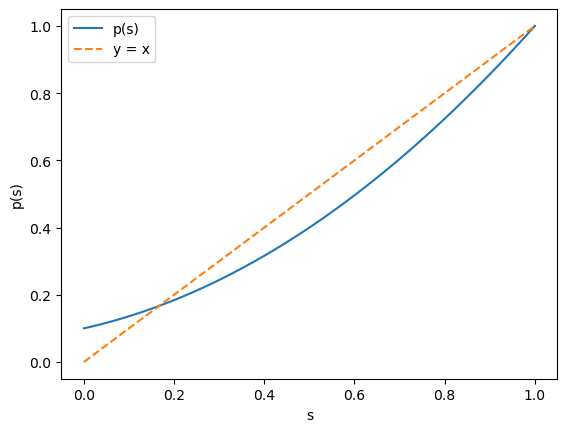

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define p(s) as a convex function
def p(s):
    return 0.1 + 0.3*s + .6*s**2 

# Create an array of s values between 0 and 1
s = np.linspace(0, 1, 100)

# Plot p(s) and the diagonal line y = x
plt.plot(s, p(s), label='p(s)')
plt.plot(s, s, label='y = x', linestyle='--')

# Add labels and legend
plt.xlabel('s')
plt.ylabel('p(s)')
plt.legend()

# Show the plot
plt.show()


There is a second intersection point to the left of $s = 1$ if and
only if the slope of $P(s)$ at $s = 1$ is strictly greater than 1.

The slope $P'(1) = \sum_{k=0} kp_k$ equals the mean number of particles of the progeny distribution.

- $P'(1) \le 1$

- $P'(1) >1$


**HW** Program the functional iteration for an extinction probability of surnames among white males in the United States.


## Newton’s Method

Newton’s method can be motivated by the **mean value theorem**.

Let $x_{n−1}$ approximate the root $x_\infty$ of the equation $g(x) = 0$. 
$$
g(x_{n−1}) = g(x_{n−1}) − g(x_\infty)
= g'(z)(x_{n−1} − x_\infty),
$$
for some $z$ between $x_{n−1}$ and $x_\infty$.

We can define the update
$$
x_n = x_{n-1} - \frac{g(x_{n−1})}{g'(x_{n−1})} = f(x_{n−1}),
$$
by substituting $x_{n-1}$ for $z$.


**When does Newton's Method work?**

    
The local convergence properties follow from

<div style="text-align: left">

$$\begin{aligned}
 f'(x_\infty) = &\\
\end{aligned}$$
</div>
    
<div style="height: 20mm;"></div>

Further let $e_n = x_n - x_\infty$, with a second-order Taylor expansion around $x_\infty$,
$$\begin{aligned}
e_n = &\\
\end{aligned}$$

<div style="height: 25mm;"></div>

We have the **quadratic convergence**
$$
\lim_{n \rightarrow \infty} \frac{e_n}{e_{n-1}^2} = \frac{1}{2} f''(x_\infty).
$$
All else being equal, quadratic convergence is preferred to linear convergence.

The following two examples highlight favorable circumstances ensuring global convergence of
Newton’s method on a properly defined domain.

### Division without Dividing

Forming the reciprocal of a number `a` is equivalent to solving for a root of
the equation $g(x) = a - x^{-1}$. Newton’s method iterates according to
$$\begin{aligned}
x_n =& x_{n-1} - \frac{a - x_{n-1}^{-1}}{x_{n-1}^{-2} } \\
=& x_{n-1}(2 - ax_{n-1}),
\end{aligned}$$
which involves multiplication and subtraction but no division.

- if $x_0 \in (0, 1/a)$

- if $x_0 \in [1/a, 2/a)$


### Extinction Probabilities by Newton’s Method

Newton’s method starts with $x_0 = 0$ and iterates according to

$$x_n = x_{n-1} + \frac{P(x_{n-1})-x_{n-1}}{1-P'(x_{n-1})}$$

**How it is guaranteed that no division by 0 in the Newton’s iterates?**

Compared to the sequence $s_n = P(s_{n−1})$ generated by functional iteration, both schemes start at 0.
**Can you show by induction that (a) $x_n\le s_\infty$, (b) $x_{n−1} \le x_n$, and (c) $s_n \le x_n$ hold
for all $n>0$?**

Given these properties, Newton’s method typically converges much faster than functional iteration.

### Golden Section Search

A simple numerical algorithm for minimization.

- Golden section search is reliable and applies to any continuous function $f(x)$. 

- It cannot generalize to higher dimensions and its relatively slow rate of convergence.

Golden section search:

- start with three points $a < b < c$ satisfying $f(b) < \min\{f(a), f(c) \}$,

- find the next bracketing interval that contains the minimum with $a < b < d$ or $b < d < c$.
    

Consider the function $f(x) = −7 \ln x − 3 \ln(1 − x)$.

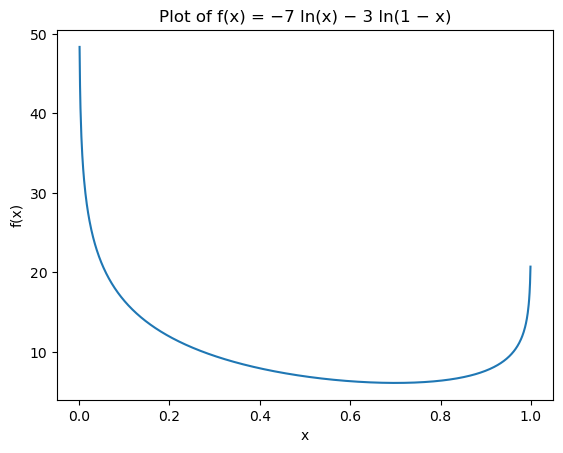

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to plot
def f(x):
    return -7 * np.log(x) - 3 * np.log(1 - x)

# Create an array of x values between 0 and 1
x = np.linspace(0.001, 0.999, 1000)

# Plot the function
plt.plot(x, f(x))

# Set the title and labels
plt.title('Plot of f(x) = −7 ln(x) − 3 ln(1 − x)')
plt.xlabel('x')
plt.ylabel('f(x)')

# Show the plot
plt.show()


In [10]:
import math

def f(x):
    return -7 * math.log(x) - 3 * math.log(1 - x)

def golden_section_search(f, a, b, tol=1e-6):
    gr = (math.sqrt(5) + 1) / 2  # golden ratio
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    while abs(c - d) > tol:
        if f(c) < f(d):
            b = d
        else:
            a = c
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        print([a,c,b])
    return (b + a) / 2

# find the minimum of f(x) on [0, 1]
x_min = golden_section_search(f, 0.01, 0.99)
print("x_min =", x_min)
print("f(x_min) =", f(x_min))


[0.3843266910251031, 0.6156733089748969, 0.99]
[0.6156733089748969, 0.758653382050206, 0.99]
[0.6156733089748969, 0.7040398538493817, 0.8470199269246909]
[0.6156733089748969, 0.6702868371757214, 0.758653382050206]
[0.6702868371757214, 0.7040398538493817, 0.758653382050206]
[0.6702868371757214, 0.6911473487028853, 0.7249003653765457]
[0.6911473487028853, 0.7040398538493816, 0.7249003653765457]
[0.6911473487028853, 0.699115355083553, 0.7120078602300494]
[0.6911473487028853, 0.696071847468714, 0.7040398538493816]
[0.696071847468714, 0.6991153550835529, 0.7040398538493816]
[0.696071847468714, 0.6979528386197036, 0.7009963462345427]
[0.6979528386197036, 0.6991153550835529, 0.7009963462345427]
[0.6991153550835529, 0.6998338297706932, 0.7009963462345427]
[0.6991153550835529, 0.6995593968602621, 0.7002778715474024]
[0.6995593968602621, 0.6998338297706933, 0.7002778715474024]
[0.6998338297706933, 0.7000034386369713, 0.7002778715474024]
[0.6998338297706933, 0.6999386538148464, 0.7001082626811244

### Minimization by Cubic Interpolation

Cubic interpolation offers a faster but less reliable method of minimization
than golden section search.

The idea is to fit a cubic polynomial to three points in the function (or four values $f(x)$ and $f'(x)$ of two points), and then finding the minimum of that polynomial. It then replaces the worst point with the new point, and continues the process until convergence.

In [11]:
# Define the cubic interpolation function
def cubic_interpolation(f, x0, x1, x2, tol):
    # Iterate until convergence
    while abs(x2 - x0) > tol:
        f0, f1, f2 = f(x0), f(x1), f(x2)
        
        # Compute the cubic interpolation point
        a = f0
        b = (f1 - f0) / (x1 - x0)
        c = ((f2 - f0) / (x2 - x0) - b) / (x2 - x1)
        x = (x0 + x1) / 2 - b / (2 * c)
        
        # Evaluate the function at the new point
        fx = f(x)
        # Update the bracketing points
        if x < x1:
            if fx < f1:
                x2, x1, x0 = x1, x, x0
                f2, f1, f0 = f1, fx, f0
            else:
                x0 = x
                f0 = fx
        else:
            if fx < f1:
                x0, x1, x2 = x1, x, x2
                f0, f1, f2 = f1, fx, f2
            else:
                x2 = x
                f2 = fx
        print([x0,x1,x2])
    return x1

In [12]:
# Define initial bracketing points
x0 = 0.01
x1 = 0.5
x2 = 0.9

# Set tolerance for convergence
tol = 1e-6


x1 = cubic_interpolation(f, x0, x1, x2, tol)
f1 = f(x1)

# Print the minimum point and function value
print("Minimum point:", x1)
print("Minimum value:", f1)

[0.5, 0.685153578272752, 0.9]
[0.6690844407433396, 0.685153578272752, 0.9]
[0.685153578272752, 0.6918826232157623, 0.9]
[0.6918826232157623, 0.6957839546710956, 0.9]
[0.6957839546710956, 0.697698380103852, 0.9]
[0.697698380103852, 0.6987730421036226, 0.9]
[0.6987730421036226, 0.6993327307919798, 0.9]
[0.6993327307919798, 0.6996409149293873, 0.9]
[0.6996409149293873, 0.6998051816445571, 0.9]
[0.6998051816445571, 0.6998947858117166, 0.9]
[0.6998947858117166, 0.6999429869523967, 0.9]
[0.6999429869523967, 0.6999691667405551, 0.9]
[0.6999691667405551, 0.699983301876257, 0.9]
[0.699983301876257, 0.6999909645273977, 0.9]
[0.6999909645273977, 0.6999951080155089, 0.9]
[0.6999951080155089, 0.6999973523277518, 0.9]
[0.6999973523277518, 0.6999985666612467, 0.9]
[0.6999985666612467, 0.6999992241811399, 0.9]
[0.6999992241811399, 0.6999995800037265, 0.9]
[0.6999995800037265, 0.6999997726862445, 0.9]
[0.6999997726862445, 0.6999998769093836, 0.9]
[0.6999998769093836, 0.6999999333848749, 0.9]
[0.6999999

### Stopping Criteria

In solving a nonlinear equation $g(x) = 0$, one can declare convergence when

- $|g(x_n)|$ is small or 

- $x_n$ does not change much from one iteration to the next


